<a href="https://colab.research.google.com/github/andreggalvao/Challenge-Data-Science-1ed/blob/main/Challenge_dados_semana2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
LINK = 'https://raw.githubusercontent.com/andreggalvao/Challenge-Data-Science-1ed/main/Dados/dados_juntos_ANDRE.csv'
dados = pd.read_csv(LINK, sep = ',')
dados.head()

,person_id,loan_id,cb_id,person_id.1,person_age,person_income,person_home_ownership,person_emp_length,loan_id.1,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_id.1,cb_person_default_on_file,cb_person_cred_hist_length
0,YIHuehGl-eWpc,IHcxHFyD-ddZE,CRO9thKh-NYDn,YIHuehGl-eWpc,29.0,175000.0,Mortgage,2.0,IHcxHFyD-ddZE,Homeimprovement,A,10000.0,NaN,0.0,0.06,CRO9thKh-NYDn,N,9.0
1,LmwskARR-HyA3,0YpSbTgj-CZKT,j3jnnG3T-iF3N,LmwskARR-HyA3,21.0,41900.0,Rent,2.0,0YpSbTgj-CZKT,Venture,C,16000.0,12.84,1.0,0.38,j3jnnG3T-iF3N,Y,2.0
2,bRYeof0L-cqHI,0T2YFLWb-IZze,0Y1a64ag-4RLW,bRYeof0L-cqHI,30.0,100000.0,Rent,13.0,0T2YFLWb-IZze,Debtconsolidation,A,12000.0,7.88,0.0,0.12,0Y1a64ag-4RLW,N,9.0
3,F9a6bBd9-Xe2o,8HuvzhAq-k7Xi,L42AQtMx-SEGR,F9a6bBd9-Xe2o,27.0,68000.0,Rent,4.0,8HuvzhAq-k7Xi,Homeimprovement,A,8700.0,7.88,0.0,0.13,L42AQtMx-SEGR,N,5.0
4,hBn6Nj78-fvgu,w1JRom7y-y1od,2SebLJsQ-lj5F,hBn6Nj78-fvgu,26.0,31200.0,Rent,8.0,w1JRom7y-y1od,Personal,A,5000.0,8.63,0.0,0.16,2SebLJsQ-lj5F,N,2.0


In [3]:
dados.drop(columns = ['person_id.1', 'loan_id.1', 'cb_id.1'], inplace = True)
dados.rename(columns = {'person_id': 'id_pessoa',
                        'loan_id': 'id_emprestimo',
                        'cb_id': 'id_historico',
                        'person_age' : 'idade',
                        'person_income' : 'renda',
                        'person_home_ownership' : 'imovel',
                        'person_emp_length' : 'tempo_trabalhado',
                        'loan_intent': 'motivo_emprestimo',
                        'loan_grade' : 'nota_emprestimo',
                        'loan_amnt' : 'total_emprestado',
                        'loan_int_rate' : 'taxa_juros',
                        'loan_status' : 'inadimplencia',
                        'loan_percent_income' : 'renda_alocada',
                        'cb_person_default_on_file' : 'devedora',
                        'cb_person_cred_hist_length' : 'relacionamento_bancario'
                        }, inplace = True)



dados.head()

,id_pessoa,id_emprestimo,id_historico,idade,renda,imovel,tempo_trabalhado,motivo_emprestimo,nota_emprestimo,total_emprestado,taxa_juros,inadimplencia,renda_alocada,devedora,relacionamento_bancario
0,YIHuehGl-eWpc,IHcxHFyD-ddZE,CRO9thKh-NYDn,29.0,175000.0,Mortgage,2.0,Homeimprovement,A,10000.0,NaN,0.0,0.06,N,9.0
1,LmwskARR-HyA3,0YpSbTgj-CZKT,j3jnnG3T-iF3N,21.0,41900.0,Rent,2.0,Venture,C,16000.0,12.84,1.0,0.38,Y,2.0
2,bRYeof0L-cqHI,0T2YFLWb-IZze,0Y1a64ag-4RLW,30.0,100000.0,Rent,13.0,Debtconsolidation,A,12000.0,7.88,0.0,0.12,N,9.0
3,F9a6bBd9-Xe2o,8HuvzhAq-k7Xi,L42AQtMx-SEGR,27.0,68000.0,Rent,4.0,Homeimprovement,A,8700.0,7.88,0.0,0.13,N,5.0
4,hBn6Nj78-fvgu,w1JRom7y-y1od,2SebLJsQ-lj5F,26.0,31200.0,Rent,8.0,Personal,A,5000.0,8.63,0.0,0.16,N,2.0


In [4]:
dados.imovel.value_counts()

Rent        17243
Mortgage    14100
Own          2717
Other         110
Name: imovel, dtype: int64

In [5]:
dados.replace({'Rent' : 'Alugado',
               'Mortgage' : 'Financiado',
               'Own' : 'Propria',
               'Other' : 'Outro'},
               inplace = True)
dados.head()

,id_pessoa,id_emprestimo,id_historico,idade,renda,imovel,tempo_trabalhado,motivo_emprestimo,nota_emprestimo,total_emprestado,taxa_juros,inadimplencia,renda_alocada,devedora,relacionamento_bancario
0,YIHuehGl-eWpc,IHcxHFyD-ddZE,CRO9thKh-NYDn,29.0,175000.0,Financiado,2.0,Homeimprovement,A,10000.0,NaN,0.0,0.06,N,9.0
1,LmwskARR-HyA3,0YpSbTgj-CZKT,j3jnnG3T-iF3N,21.0,41900.0,Alugado,2.0,Venture,C,16000.0,12.84,1.0,0.38,Y,2.0
2,bRYeof0L-cqHI,0T2YFLWb-IZze,0Y1a64ag-4RLW,30.0,100000.0,Alugado,13.0,Debtconsolidation,A,12000.0,7.88,0.0,0.12,N,9.0
3,F9a6bBd9-Xe2o,8HuvzhAq-k7Xi,L42AQtMx-SEGR,27.0,68000.0,Alugado,4.0,Homeimprovement,A,8700.0,7.88,0.0,0.13,N,5.0
4,hBn6Nj78-fvgu,w1JRom7y-y1od,2SebLJsQ-lj5F,26.0,31200.0,Alugado,8.0,Personal,A,5000.0,8.63,0.0,0.16,N,2.0


In [6]:
dados.motivo_emprestimo.value_counts()

dados.replace({'Education' : 'Educacao',
               'Medical' : 'Medico',
               'Venture' : 'Empreendimento',
               'Personal' : 'Pessoal',
               'Debtconsolidation' : 'Dividas',
               'Homeimprovement' : 'Reforma'},
               inplace = True)

dados.head()

,id_pessoa,id_emprestimo,id_historico,idade,renda,imovel,tempo_trabalhado,motivo_emprestimo,nota_emprestimo,total_emprestado,taxa_juros,inadimplencia,renda_alocada,devedora,relacionamento_bancario
0,YIHuehGl-eWpc,IHcxHFyD-ddZE,CRO9thKh-NYDn,29.0,175000.0,Financiado,2.0,Reforma,A,10000.0,NaN,0.0,0.06,N,9.0
1,LmwskARR-HyA3,0YpSbTgj-CZKT,j3jnnG3T-iF3N,21.0,41900.0,Alugado,2.0,Empreendimento,C,16000.0,12.84,1.0,0.38,Y,2.0
2,bRYeof0L-cqHI,0T2YFLWb-IZze,0Y1a64ag-4RLW,30.0,100000.0,Alugado,13.0,Dividas,A,12000.0,7.88,0.0,0.12,N,9.0
3,F9a6bBd9-Xe2o,8HuvzhAq-k7Xi,L42AQtMx-SEGR,27.0,68000.0,Alugado,4.0,Reforma,A,8700.0,7.88,0.0,0.13,N,5.0
4,hBn6Nj78-fvgu,w1JRom7y-y1od,2SebLJsQ-lj5F,26.0,31200.0,Alugado,8.0,Pessoal,A,5000.0,8.63,0.0,0.16,N,2.0


In [8]:
#print("*"*30, "HEAD", "*"*30)
#display(dados.head(5))
print("*"*30, "FORMA", "*"*30)
print(f"Rows: {dados.shape[0]}\nColumns: {dados.shape[1]}")
print("*"*30, "INFO", "*"*30)
display(dados.info())
print("*"*30, "DESCRIBE", "*"*30)
display(dados.describe().T.round(2))
print("*"*30, "NULOS?", "*"*30)
display(dados.isnull().sum())

****************************** FORMA ******************************
Rows: 34501
Columns: 15
****************************** INFO ******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34501 entries, 0 to 34500
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id_pessoa                34485 non-null  object 
 1   id_emprestimo            34501 non-null  object 
 2   id_historico             34501 non-null  object 
 3   idade                    34177 non-null  float64
 4   renda                    34162 non-null  float64
 5   imovel                   34170 non-null  object 
 6   tempo_trabalhado         33247 non-null  float64
 7   motivo_emprestimo        34186 non-null  object 
 8   nota_emprestimo          34188 non-null  object 
 9   total_emprestado         34170 non-null  float64
 10  taxa_juros               30871 non-null  float64
 11  inadimplencia            

None

****************************** DESCRIBE ******************************


,count,mean,std,min,25%,50%,75%,max
idade,34177.0,27.73,6.35,20.00,23.00,26.00,30.00,144.00
renda,34162.0,66028.69,61405.06,4000.00,38493.00,55000.00,79200.00,6000000.00
tempo_trabalhado,33247.0,4.79,4.14,0.00,2.00,4.00,7.00,123.00
total_emprestado,34170.0,9590.58,6320.43,500.00,5000.00,8000.00,12200.00,35000.00
taxa_juros,30871.0,11.01,3.24,5.42,7.90,10.99,13.47,23.22
inadimplencia,34158.0,0.22,0.41,0.00,0.00,0.00,0.00,1.00
renda_alocada,34182.0,0.17,0.11,0.00,0.09,0.15,0.23,0.83
relacionamento_bancario,34497.0,5.81,4.06,2.00,3.00,4.00,8.00,30.00


****************************** NULOS? ******************************


id_pessoa                    16
id_emprestimo                 0
id_historico                  0
idade                       324
renda                       339
imovel                      331
tempo_trabalhado           1254
motivo_emprestimo           315
nota_emprestimo             313
total_emprestado            331
taxa_juros                 3630
inadimplencia               343
renda_alocada               319
devedora                    370
relacionamento_bancario       4
dtype: int64

In [9]:
#dupliando o nosso dataset
dados_original = dados.copy()
dados.head()

,id_pessoa,id_emprestimo,id_historico,idade,renda,imovel,tempo_trabalhado,motivo_emprestimo,nota_emprestimo,total_emprestado,taxa_juros,inadimplencia,renda_alocada,devedora,relacionamento_bancario
0,YIHuehGl-eWpc,IHcxHFyD-ddZE,CRO9thKh-NYDn,29.0,175000.0,Financiado,2.0,Reforma,A,10000.0,NaN,0.0,0.06,N,9.0
1,LmwskARR-HyA3,0YpSbTgj-CZKT,j3jnnG3T-iF3N,21.0,41900.0,Alugado,2.0,Empreendimento,C,16000.0,12.84,1.0,0.38,Y,2.0
2,bRYeof0L-cqHI,0T2YFLWb-IZze,0Y1a64ag-4RLW,30.0,100000.0,Alugado,13.0,Dividas,A,12000.0,7.88,0.0,0.12,N,9.0
3,F9a6bBd9-Xe2o,8HuvzhAq-k7Xi,L42AQtMx-SEGR,27.0,68000.0,Alugado,4.0,Reforma,A,8700.0,7.88,0.0,0.13,N,5.0
4,hBn6Nj78-fvgu,w1JRom7y-y1od,2SebLJsQ-lj5F,26.0,31200.0,Alugado,8.0,Pessoal,A,5000.0,8.63,0.0,0.16,N,2.0


In [10]:
# os IDs não me interessam uma vez que não vão me trazer informações para o meu modelo, todos seram removidos.
dados.drop(columns = ['id_pessoa', 'id_emprestimo', 'id_historico'], inplace = True)

In [15]:
dados.imovel.isna().sum()

0

In [12]:
#Substituindo os imoveis NaN por outros
values = {'imovel': 'Outro', }
dados.fillna(value=values, inplace = True)

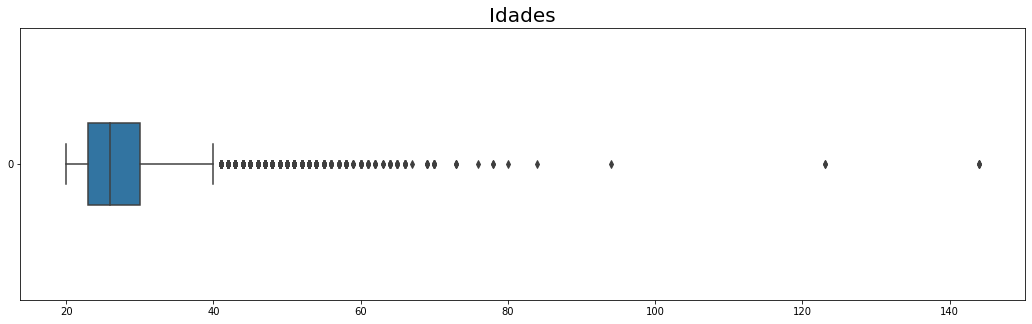

In [16]:
ax = sns.boxplot(data = dados.idade, orient = 'h', width = 0.3)
ax.figure.set_size_inches(18, 5)
ax.set_title('Idades', fontsize=20)
ax

In [17]:
# O boxplot apresenta muito outliers o que já era esperado para um fator de idade, devemos investigar o que "não deveria" estar ai.

dados.query('idade > 90')

,idade,renda,imovel,tempo_trabalhado,motivo_emprestimo,nota_emprestimo,total_emprestado,taxa_juros,inadimplencia,renda_alocada,devedora,relacionamento_bancario
226,94.0,24000.0,Alugado,1.0,Medico,C,6500.0,NaN,0.0,0.27,N,27.0
4721,144.0,200000.0,Financiado,4.0,Educacao,B,6000.0,11.86,0.0,0.03,N,2.0
16160,123.0,78000.0,Alugado,7.0,Empreendimento,B,20000.0,NaN,0.0,0.26,N,4.0
26078,144.0,250000.0,Alugado,4.0,Empreendimento,C,4800.0,13.57,0.0,0.02,N,3.0
27237,123.0,80004.0,Alugado,2.0,Educacao,B,20400.0,10.25,0.0,0.25,N,3.0
33832,144.0,6000000.0,Financiado,12.0,Pessoal,C,5000.0,12.73,0.0,0.00,N,25.0


In [18]:
#A busca nos mostrou idades ireais, podemos encarar como um erro de digitação e será deletado
dados.drop(index = dados.query('idade > 100').index, inplace = True)

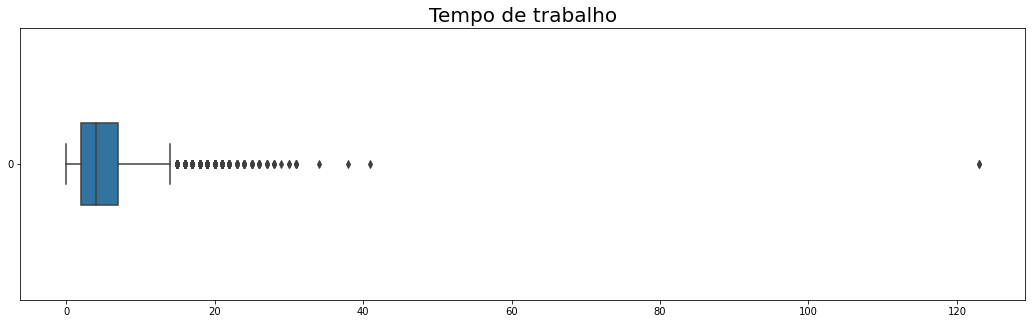

In [19]:
ax = sns.boxplot(data = dados.tempo_trabalhado, orient = 'h', width = 0.3)
ax.figure.set_size_inches(18, 5)
ax.set_title('Tempo de trabalho', fontsize=20)
ax

In [30]:
dados.query('tempo_trabalhado > 50')

,idade,renda,imovel,tempo_trabalhado,motivo_emprestimo,nota_emprestimo,total_emprestado,taxa_juros,inadimplencia,renda_alocada,devedora,relacionamento_bancario
9068,78.0,48000.0,Alugado,60.0,Medico,A,1500.0,11.12,NaN,0.03,N,7.0
15010,70.0,39996.0,Alugado,52.0,Medico,C,3600.0,15.23,0.0,0.09,Y,19.0
22198,70.0,30000.0,Alugado,52.0,Medico,B,10800.0,13.57,NaN,0.27,N,7.0


In [21]:
#A busca nos mostrou tempos de trabalho ireais, podemos encarar como um erro de digitação e será deletado
dados.drop(index = dados.query('tempo_trabalhado > 50').index, inplace = True)

In [22]:
dados.query('renda_alocada == 0')

,idade,renda,imovel,tempo_trabalhado,motivo_emprestimo,nota_emprestimo,total_emprestado,taxa_juros,inadimplencia,renda_alocada,devedora,relacionamento_bancario
1727,30.0,522000.0,Financiado,11.0,Reforma,A,2500.0,7.43,0.0,0.0,N,9.0
8784,43.0,780000.0,Financiado,2.0,Reforma,A,1000.0,8.94,0.0,0.0,N,11.0
10816,60.0,1900000.0,Financiado,5.0,Pessoal,A,1500.0,NaN,0.0,0.0,N,21.0
15061,42.0,2039784.0,Alugado,0.0,Empreendimento,C,8450.0,12.29,0.0,0.0,Y,15.0
20664,47.0,1362000.0,Financiado,9.0,Empreendimento,A,6600.0,7.74,0.0,0.0,N,17.0
26195,35.0,510000.0,Alugado,1.0,Pessoal,C,1800.0,13.48,0.0,0.0,N,6.0
27716,34.0,948000.0,Financiado,18.0,Pessoal,B,2000.0,9.99,0.0,0.0,N,7.0
34343,44.0,1440000.0,Financiado,7.0,Dividas,A,6400.0,7.40,0.0,0.0,N,15.0


In [ ]:
## Sobre empréstimos
# O percentual de renda alocada (renda_alocada) = renda / total_emprestado
# Com isso podemos reverter algumas linhas nulas
dados[['renda', 'total_emprestado', 'renda_alocada']].isnull().sum()

In [23]:
dados.loc[dados.renda_alocada == 0, 'renda_alocada'] = (dados.total_emprestado / dados.renda).round(2) #corrigindo o renda alocada


In [25]:
dados.loc[dados.tempo_trabalhado.isna()]

,idade,renda,imovel,tempo_trabalhado,motivo_emprestimo,nota_emprestimo,total_emprestado,taxa_juros,inadimplencia,renda_alocada,devedora,relacionamento_bancario
83,NaN,40000.0,Alugado,NaN,Empreendimento,B,4500.0,14.74,1.0,0.10,N,10.0
128,24.0,30996.0,Propria,NaN,Educacao,A,8000.0,7.51,0.0,0.26,N,3.0
162,24.0,63554.0,Financiado,NaN,Dividas,A,2500.0,7.51,0.0,0.04,N,2.0
217,34.0,120000.0,Alugado,NaN,Dividas,A,2000.0,NaN,NaN,0.04,N,3.0
265,32.0,NaN,Alugado,NaN,Medico,A,12000.0,14.54,0.0,0.27,N,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
34433,22.0,20400.0,Alugado,NaN,Pessoal,B,9000.0,NaN,0.0,NaN,N,2.0
34439,28.0,83004.0,Alugado,NaN,Medico,A,9000.0,7.14,0.0,NaN,N,4.0
34473,30.0,22800.0,Propria,NaN,Empreendimento,A,7000.0,7.51,0.0,0.31,N,8.0
34490,24.0,27360.0,Financiado,NaN,Pessoal,A,6000.0,NaN,0.0,0.07,Y,7.0


In [26]:
#Com o intuíto de não perderm uitas linhas, vamos corrigir o tempo de trabalho com a tese de que todos começaram a trabalhar aos 18

dados.loc[dados.tempo_trabalhado.isna(), 'tempo_trabalhado'] = dados.idade - 18

In [29]:
dados.query('tempo_trabalhado > 40')

,idade,renda,imovel,tempo_trabalhado,motivo_emprestimo,nota_emprestimo,total_emprestado,taxa_juros,inadimplencia,renda_alocada,devedora,relacionamento_bancario
6098,78.0,48000.0,Alugado,41.0,Medico,A,3000.0,7.51,0.0,0.06,N,25.0
9068,78.0,48000.0,Alugado,60.0,Medico,A,1500.0,11.12,NaN,0.03,N,7.0
12594,66.0,300000.0,Financiado,48.0,Pessoal,NaN,5000.0,11.48,0.0,0.17,N,4.0
15010,70.0,39996.0,Alugado,52.0,Medico,C,3600.0,15.23,0.0,0.09,Y,19.0
19889,64.0,120000.0,Financiado,46.0,Pessoal,B,1500.0,NaN,0.0,0.02,N,3.0
22198,70.0,30000.0,Alugado,52.0,Medico,B,10800.0,13.57,NaN,0.27,N,7.0


In [289]:
dados.isna().sum()

idade                       324
renda                       339
imovel                        0
tempo_trabalhado             41
motivo_emprestimo           315
nota_emprestimo             313
total_emprestado            331
taxa_juros                 3629
inadimplencia               343
renda_alocada               319
devedora                    370
relacionamento_bancario       4
dtype: int64

In [290]:
taxa_juros_por_nota = pd.crosstab(dados.nota_emprestimo,
                         dados.motivo_emprestimo,
                         aggfunc = ['mean'],
                         values = dados.taxa_juros)

taxa_juros_por_nota.style.format('{:.2f}')


In [34]:
a_uf = dados.groupby(['motivo_emprestimo']).agg({'taxa_juros': ['mean', 'median', 'max', 'std']})
a_uf

taxa_juros                        
                        mean median    max       std
motivo_emprestimo                                   
Dividas            10.984931  10.99  22.11  3.262148
Educacao           10.962417  10.99  21.74  3.192129
Empreendimento     10.954478  10.99  22.48  3.222410
Medico             11.053941  10.99  21.74  3.231814
Pessoal            10.984765  10.99  21.74  3.222894
Reforma            11.188808  11.13  23.22  3.355030

In [291]:
taxa_juros_por_nota.T.mean()

nota_emprestimo
A     7.425835
B    10.989453
C    13.384982
D    15.244216
E    16.833148
F    18.505539
G    20.235737
dtype: float64

In [292]:
taxa_juros_por_nota.T.mean()[0]


7.42583491946731

In [293]:
dados.taxa_juros.describe()

count    30865.000000
mean        11.013472
std          3.241276
min          5.420000
25%          7.900000
50%         10.990000
75%         13.470000
max         23.220000
Name: taxa_juros, dtype: float64

In [294]:
dados.loc[(dados.nota_emprestimo == 'A') & (dados.taxa_juros.isna()), 'taxa_juros'] = taxa_juros_por_nota.T.mean()[0]
dados.loc[(dados.nota_emprestimo == 'B') & (dados.taxa_juros.isna()), 'taxa_juros'] = taxa_juros_por_nota.T.mean()[1]
dados.loc[(dados.nota_emprestimo == 'C') & (dados.taxa_juros.isna()), 'taxa_juros'] = taxa_juros_por_nota.T.mean()[2]
dados.loc[(dados.nota_emprestimo == 'D') & (dados.taxa_juros.isna()), 'taxa_juros'] = taxa_juros_por_nota.T.mean()[3]
dados.loc[(dados.nota_emprestimo == 'E') & (dados.taxa_juros.isna()), 'taxa_juros'] = taxa_juros_por_nota.T.mean()[4]
dados.loc[(dados.nota_emprestimo == 'F') & (dados.taxa_juros.isna()), 'taxa_juros'] = taxa_juros_por_nota.T.mean()[5]
dados.loc[(dados.nota_emprestimo == 'G') & (dados.taxa_juros.isna()), 'taxa_juros'] = taxa_juros_por_nota.T.mean()[6]